**CS 5834, Fall 2020: Intro to Urban Computing Project - Association Rules analysis for Gentrification using Denver Data Set**




### Imports and Mount File Directories


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import sys
# modify "customized_path_to_homework", path of folder in drive, where you project is stored
customized_path_to_homework = "/content/drive/My Drive/cs5834/urbcomp_fall2020/project"
file_name = "Denver_typology_output.csv"

sys.path.append(customized_path_to_homework)

In [3]:
%cd $customized_path_to_homework/data

/content/drive/My Drive/cs5834/urbcomp_fall2020/project/data


In [4]:
import os, sys
import pandas as pd
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import datetime
import warnings


In [5]:

"""
sys.path.insert(0,'../')
%load_ext autoreload
%autoreload 2
import nyctaxi_helpers
warnings.filterwarnings('ignore')
"""

"\nsys.path.insert(0,'../')\n%load_ext autoreload\n%autoreload 2\nimport nyctaxi_helpers\nwarnings.filterwarnings('ignore')\n"

In [6]:
pip install --upgrade mlxtend


     |████████████████████████████████| 1.4MB 13.9MB/s 
  Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [7]:
#ref https://pbpython.com/market-basket-analysis.html


#may need to install mlxtend package - pip install mlxtend in console
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules


# **Process Urban Displacement Model Data for Gentrificaiton**


Reference: https://www.urbandisplacement.org/open-source-project

Based on the work https://ww2.arb.ca.gov/sites/default/files/classic//research/apr/past/13-310.pdf?_ga=2.269282425.968981409.1605209194-851335111.1605209194

**Developing a New
Methodology for Analyzing
Potential Displacement**

University of California, Berkeley

Principal Investigator:
Karen Chapple 

https://ww3.arb.ca.gov/research/single-project.php?row_id=65188

**Obtain the Data**

Data can be found at https://github.com/urban-displacement/displacement-typologies/blob/main/data/outputs/typologies/LosAngeles_typology_output.csv

In [8]:
#!wget -nc https://raw.githubusercontent.com/urban-displacement/displacement-typologies/main/data/outputs/typologies/LosAngeles_typology_output.csv

In [9]:
## Process Data - if data file already processed then can start at Associaton Rules section
# get the Data File

df = pd.read_csv("https://raw.githubusercontent.com/urban-displacement/displacement-typologies/main/data/outputs/typologies/{}".format(file_name), index_col=0)
#df = pd.read_csv("{}/data/{}".format(customized_path_to_homework, file_name), index_col=0)

# sneak peak in the data
df.head(10)


,pop_18,white_18,hh_18,hinc_18,mhval_18,mhval_18_se,mrent_18,mrent_18_se,total_25_18,total_25_col_bd_18,total_25_col_md_18,total_25_col_pd_18,total_25_col_phd_18,tot_units_built_18,units_40_49_built_18,units_39_early_built_18,ohu_18,rhu_18,mmhcosts_18,iinc_18,mov_wc_w_income_18,mov_wc_9000_18,mov_wc_15000_18,mov_wc_25000_18,mov_wc_35000_18,mov_wc_50000_18,mov_wc_65000_18,mov_wc_75000_18,mov_wc_76000_more_18,mov_oc_w_income_18,mov_oc_9000_18,mov_oc_15000_18,mov_oc_25000_18,state_x,county_x,tract_x,mov_oc_35000_18,mov_oc_50000_18,mov_oc_65000_18,mov_oc_75000_18,...,aboverm_pctch_real_mrent_12_18,aboverm_pctch_real_mhval_90_00,aboverm_pctch_real_mrent_90_00,lostli_00,lostli_18,aboverm_pctch_real_hinc_90_00,aboverm_pctch_real_hinc_00_18,aboverm_ch_per_col_90_00,aboverm_ch_per_col_00_18,aboverm_per_units_pre50_18,GEOID,rail,presence_ph_LIHTC,vul_gent_90,vul_gent_00,vul_gent_18,hotmarket_00,hotmarket_18,gent_90_00,gent_90_00_urban,gent_00_18,gent_00_18_urban,dp_PChRent,dp_RentGap,tr_rent_gap,rm_rent_gap,dense,SAE,AdvG,ARE,BE,SMMI,ARG,EOG,OD,OD_loss,LISD,double_counted,typology,typ_cat
0,3850.0,1619.0,1618.0,55541.0,257400.0,15691.0,1267.0,199.0,2996.0,570.0,287.0,9.0,32.0,1704.0,881.0,118.0,1068.0,550.0,1208.0,30644.0,223.0,11.0,53.0,33.0,26.0,43.0,19.0,7.0,31.0,293.0,49.0,0.0,12.0,8,31,201,13.0,89.0,90.0,0.0,...,0,0,0,0,0,0,0,0,1,1,8031000201,0,True,1,1,1,0.0,0.0,0,0,0,0,1,0,-172.078576,20.207763,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1,1.0,1.0,['LISD']
1,3165.0,1994.0,1859.0,62664.0,497000.0,67484.0,1152.0,76.0,2620.0,1048.0,465.0,100.0,21.0,1995.0,23.0,389.0,411.0,1448.0,1233.0,44028.0,467.0,44.0,0.0,84.0,0.0,53.0,144.0,26.0,116.0,394.0,47.0,11.0,50.0,8,31,600,55.0,55.0,65.0,44.0,...,1,0,0,0,0,0,1,1,1,1,8031000600,1,True,1,1,1,0.0,1.0,0,0,0,1,1,0,17.024437,20.207763,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0.0,0,1.0,6.0,['SMMI']
2,1462.0,182.0,465.0,9766.0,-666666666.0,-222222222.0,241.0,28.0,557.0,28.0,1.0,0.0,0.0,511.0,22.0,105.0,53.0,412.0,240.0,9448.0,100.0,48.0,11.0,14.0,7.0,11.0,9.0,0.0,0.0,55.0,38.0,1.0,0.0,8,31,800,8.0,0.0,8.0,0.0,...,0,0,0,0,1,0,0,0,0,1,8031000800,0,True,1,1,1,0.0,0.0,0,0,0,0,1,1,891.292808,20.207763,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,1.0,0,1.0,3.0,['ARG']
3,6276.0,1176.0,1897.0,56042.0,221700.0,14842.0,1129.0,52.0,4001.0,625.0,66.0,13.0,0.0,1942.0,348.0,155.0,1206.0,691.0,1088.0,26127.0,213.0,37.0,10.0,25.0,51.0,42.0,21.0,19.0,8.0,98.0,15.0,0.0,68.0,8,31,902,0.0,8.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,1,8031000902,0,True,0,1,1,0.0,0.0,0,0,0,0,1,0,-48.091619,20.207763,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0.0,0,1.0,3.0,['ARG']
4,6654.0,1654.0,1977.0,43594.0,183100.0,13150.0,1160.0,149.0,3963.0,404.0,62.0,22.0,0.0,2084.0,364.0,463.0,998.0,979.0,1022.0,24949.0,163.0,33.0,9.0,48.0,67.0,0.0,0.0,6.0,0.0,160.0,10.0,7.0,30.0,8,31,903,79.0,8.0,26.0,0.0,...,0,0,0,0,0,0,0,0,0,1,8031000903,0,True,1,1,1,0.0,0.0,0,0,0,0,1,0,-57.732255,20.207763,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0.0,0,1.0,3.0,['ARG']
5,2652.0,961.0,1009.0,55568.0,399500.0,38577.0,933.0,213.0,1942.0,495.0,99.0,41.0,16.0,1094.0,108.0,491.0,515.0,494.0,1160.0,31362.0,165.0,26.0,0.0,16.0,11.0,18.0,23.0,17.0,54.0,157.0,49.0,21.0,37.0,8,31,1101,21.0,9.0,0.0,5.0,...,0,0,0,0,1,0,1,0,1,1,8031001101,0,True,1,1,1,0.0,1.0,0,0,1,1,1,1,311.244378,20.207763,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1.0,0,1.0,2.0,['OD']
6,5428.0,1127.0,1727.0,53180.0,243600.0,26055.0,1198.0,115.0,3748.0,563.0,127.0,23.0,24.0,1752.0,269.0,136.0,912.0,815.0,1195.0,29533.0,77.0,7.0,12.0,25.0,14.0,8.0,0.0,0.0,11.0,82.0,9.0,5.0,15.0,8,31,1301,18.0,27.0,8.0,0.0,...,0,0,0,0,0,0,0,0,0,1,8031001301,0,True,0,1,1,0.0,0.0,0,0,0,0,1,0,-95.161290,20.207763,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1,1.0,1.0,['LISD']
7,4076.0,1151.0,1446.0,42474.0,223600.0,19023.0,1183.0,321.0,2696.0,259.0,123.0,26.0,8.0,1466.0,126.0,94.0,878.0,568.0,959.0,25738.0,294.0,129.0,23.0,25.0,63.0,22.0,19.0,13.0,0.0,80.0,20.0,11.0,26.0,8,31,1302,0.0,9.0,8.0,6.0,...,0,0,0,0,0,0,0,0,0,1,8031001302,1,True,0,1,1,0.0,0.0,0,0,0,0,1,0,-11.960447,20.207763,0,0.0,0.0,0.0,0.0

In [10]:
df.columns

Index(['pop_18', 'white_18', 'hh_18', 'hinc_18', 'mhval_18', 'mhval_18_se',
       'mrent_18', 'mrent_18_se', 'total_25_18', 'total_25_col_bd_18',
       ...
       'BE', 'SMMI', 'ARG', 'EOG', 'OD', 'OD_loss', 'LISD', 'double_counted',
       'typology', 'typ_cat'],
      dtype='object', length=305)

In [11]:
"""
# create a working copy of the data to process
df2 = df.copy()

#removed  'inc_cat_medhhinc_encoded18', 'inc_cat_medhhinc_encoded00',
df2 = df2[[ 'inc80_18',
 'inc120_18',
 'inc80_00',
 'inc120_00',
 'inc80_90',
 'low_80120_18',
 'mod_80120_18',
 'high_80120_18',
 'low_pdmt_medhhinc_18',
 'high_pdmt_medhhinc_18',
 'mod_pdmt_medhhinc_18',
 'mix_low_medhhinc_18',
 'mix_mod_medhhinc_18',
 'mix_high_medhhinc_18',

 'low_80120_00',
 'mod_80120_00',
 'high_80120_00',
 'low_pdmt_medhhinc_00',
 'high_pdmt_medhhinc_00',
 'mod_pdmt_medhhinc_00',
 'mix_low_medhhinc_00',
 'mix_mod_medhhinc_00',
 'mix_high_medhhinc_00',

 'per_all_li_90',
 'per_all_li_00',
 'per_all_li_18',
 'per_nonwhite_90',
 'per_nonwhite_00',
 'per_nonwhite_18',
 'per_rent_90',
 'per_rent_00',
 'per_rent_18',
 'per_col_90',
 'per_col_00',
 'per_col_18',
 'per_units_pre50_18',
 'per_limove_18',
 'per_limove_12',
 'lmh_flag_category',
 'pctch_real_mhval_00_18',
 'pctch_real_mrent_12_18',
 'rent_decrease',
 'rent_marginal',
 'rent_increase',
 'rent_rapid_increase',
 'house_decrease',
 'house_marginal',
 'house_increase',
 'house_rapid_increase',
 'tot_decrease',
 'tot_marginal',
 'tot_increase',
 'tot_rapid_increase',
 'change_flag_category',
 'per_ch_zillow_12_18',
 'ab_50pct_ch',
 'ab_90percentile_ch',
 'rent_50pct_ch',
 'rent_90percentile_ch',
 'hv_abrm_ch',
 'rent_abrm_ch',
 'pctch_real_mhval_90_00',
 'pctch_real_mrent_90_00',
 'pctch_real_hinc_90_00',
 'pctch_real_mrent_00_18',
 'pctch_real_hinc_00_18',
 'ch_per_col_90_00',
 'ch_per_col_00_18',
 'ch_per_limove_12_18',
 'aboverm_per_all_li_90',
 'aboverm_per_all_li_00',
 'aboverm_per_all_li_18',
 'aboverm_per_nonwhite_18',
 'aboverm_per_nonwhite_90',
 'aboverm_per_nonwhite_00',
 'aboverm_per_rent_90',
 'aboverm_per_rent_00',
 'aboverm_per_rent_18',
 'aboverm_per_col_90',
 'aboverm_per_col_00',
 'aboverm_per_col_18',
 'aboverm_real_mrent_90',
 'aboverm_real_mrent_00',
 'aboverm_real_mrent_12',
 'aboverm_real_mrent_18',
 'aboverm_real_mhval_90',
 'aboverm_real_mhval_00',
 'aboverm_real_mhval_18',
 'aboverm_pctch_real_mhval_00_18',
 'aboverm_pctch_real_mrent_00_18',
 'aboverm_pctch_real_mrent_12_18',
 'aboverm_pctch_real_mhval_90_00',
 'aboverm_pctch_real_mrent_90_00',
 'lostli_00',
 'lostli_18',
 'aboverm_pctch_real_hinc_90_00',
 'aboverm_pctch_real_hinc_00_18',
 'aboverm_ch_per_col_90_00',
 'aboverm_ch_per_col_00_18',
 'aboverm_per_units_pre50_18',
 'GEOID',
 'rail',
 'presence_ph_LIHTC',
 'hotmarket_00',
 'hotmarket_18',
 'dp_PChRent',
 'dp_RentGap',
 'dense',
 'typology']]


# drop rows which dont have a gentrification category
df2.dropna(subset=['typology'], inplace=True)
df2 = df2.set_index('GEOID')

#fill the nas
df2.fillna(0.0, inplace=True)


df2.head(10)
"""

"\n# create a working copy of the data to process\ndf2 = df.copy()\n\n#removed  'inc_cat_medhhinc_encoded18', 'inc_cat_medhhinc_encoded00',\ndf2 = df2[[ 'inc80_18',\n 'inc120_18',\n 'inc80_00',\n 'inc120_00',\n 'inc80_90',\n 'low_80120_18',\n 'mod_80120_18',\n 'high_80120_18',\n 'low_pdmt_medhhinc_18',\n 'high_pdmt_medhhinc_18',\n 'mod_pdmt_medhhinc_18',\n 'mix_low_medhhinc_18',\n 'mix_mod_medhhinc_18',\n 'mix_high_medhhinc_18',\n\n 'low_80120_00',\n 'mod_80120_00',\n 'high_80120_00',\n 'low_pdmt_medhhinc_00',\n 'high_pdmt_medhhinc_00',\n 'mod_pdmt_medhhinc_00',\n 'mix_low_medhhinc_00',\n 'mix_mod_medhhinc_00',\n 'mix_high_medhhinc_00',\n\n 'per_all_li_90',\n 'per_all_li_00',\n 'per_all_li_18',\n 'per_nonwhite_90',\n 'per_nonwhite_00',\n 'per_nonwhite_18',\n 'per_rent_90',\n 'per_rent_00',\n 'per_rent_18',\n 'per_col_90',\n 'per_col_00',\n 'per_col_18',\n 'per_units_pre50_18',\n 'per_limove_18',\n 'per_limove_12',\n 'lmh_flag_category',\n 'pctch_real_mhval_00_18',\n 'pctch_real_mrent_1

In [12]:
# create a working copy of the data to process
df2 = df.copy()

"""
removed  'inc_cat_medhhinc_encoded18', 'inc_cat_medhhinc_encoded00', 
'inc80_18',
 'inc120_18',
 'inc80_00',
 'inc120_00',
 'inc80_90',
  'per_col_90',
 'per_col_00',
 'per_col_18',
  'tot_decrease',
 'tot_marginal',
 'tot_increase',
 'tot_rapid_increase',
  'pctch_real_mhval_90_00',
 'pctch_real_mrent_90_00',
 'pctch_real_mrent_00_18',
 'per_units_pre50_18',
  
"""

df2.head(10)
df2 = df2[[ 

 'low_80120_18',
 'mod_80120_18',
 'high_80120_18',
 'low_pdmt_medhhinc_18',
 'high_pdmt_medhhinc_18',
 'mod_pdmt_medhhinc_18',
 'mix_low_medhhinc_18',
 'mix_mod_medhhinc_18',
 'mix_high_medhhinc_18',

 'low_80120_00',
 'mod_80120_00',
 'high_80120_00',
 'low_pdmt_medhhinc_00',
 'high_pdmt_medhhinc_00',
 'mod_pdmt_medhhinc_00',
 'mix_low_medhhinc_00',
 'mix_mod_medhhinc_00',
 'mix_high_medhhinc_00',

 'per_all_li_90',
 'per_all_li_00',
 'per_all_li_18',
 'per_nonwhite_90',
 'per_nonwhite_00',
 'per_nonwhite_18',
 'per_rent_90',
 'per_rent_00',
 'per_rent_18',

 
 'per_limove_18',
 'per_limove_12',
 'lmh_flag_category',
 'pctch_real_mhval_00_18',
 'pctch_real_mrent_12_18',
 'rent_decrease',
 'rent_marginal',
 'rent_increase',
 'rent_rapid_increase',
 'house_decrease',
 'house_marginal',
 'house_increase',
 'house_rapid_increase',

 'change_flag_category',
 'per_ch_zillow_12_18',
 'ab_50pct_ch',
 'ab_90percentile_ch',
 'rent_50pct_ch',
 'rent_90percentile_ch',
 'hv_abrm_ch',
 'rent_abrm_ch',

 'pctch_real_hinc_90_00',
 
 'pctch_real_hinc_00_18',
 'ch_per_col_90_00',
 'ch_per_col_00_18',
 'ch_per_limove_12_18',
 'aboverm_per_all_li_90',
 'aboverm_per_all_li_00',
 'aboverm_per_all_li_18',
 'aboverm_per_nonwhite_18',
 'aboverm_per_nonwhite_90',
 'aboverm_per_nonwhite_00',
 'aboverm_per_rent_90',
 'aboverm_per_rent_00',
 'aboverm_per_rent_18',
 'aboverm_per_col_90',
 'aboverm_per_col_00',
 'aboverm_per_col_18',
 'aboverm_real_mrent_90',
 'aboverm_real_mrent_00',
 'aboverm_real_mrent_12',
 'aboverm_real_mrent_18',
 'aboverm_real_mhval_90',
 'aboverm_real_mhval_00',
 'aboverm_real_mhval_18',
 'aboverm_pctch_real_mhval_00_18',
 'aboverm_pctch_real_mrent_00_18',
 'aboverm_pctch_real_mrent_12_18',
 'aboverm_pctch_real_mhval_90_00',
 'aboverm_pctch_real_mrent_90_00',
 'lostli_00',
 'lostli_18',
 'aboverm_pctch_real_hinc_90_00',
 'aboverm_pctch_real_hinc_00_18',
 'aboverm_ch_per_col_90_00',
 'aboverm_ch_per_col_00_18',
 'aboverm_per_units_pre50_18',
 'GEOID',
 'rail',
 'presence_ph_LIHTC',
 'hotmarket_00',
 'hotmarket_18',
 'dp_PChRent',
 'dp_RentGap',
 'dense',
 'typology']]

# drop rows which dont have a gentrification category
df2.dropna(subset=['typology'], inplace=True)
df2 = df2.set_index('GEOID')

#fill the nas
df2.fillna(0.0, inplace=True)


df2.head(10)

,low_80120_18,mod_80120_18,high_80120_18,low_pdmt_medhhinc_18,high_pdmt_medhhinc_18,mod_pdmt_medhhinc_18,mix_low_medhhinc_18,mix_mod_medhhinc_18,mix_high_medhhinc_18,low_80120_00,mod_80120_00,high_80120_00,low_pdmt_medhhinc_00,high_pdmt_medhhinc_00,mod_pdmt_medhhinc_00,mix_low_medhhinc_00,mix_mod_medhhinc_00,mix_high_medhhinc_00,per_all_li_90,per_all_li_00,per_all_li_18,per_nonwhite_90,per_nonwhite_00,per_nonwhite_18,per_rent_90,per_rent_00,per_rent_18,per_limove_18,per_limove_12,lmh_flag_category,pctch_real_mhval_00_18,pctch_real_mrent_12_18,rent_decrease,rent_marginal,rent_increase,rent_rapid_increase,house_decrease,house_marginal,house_increase,house_rapid_increase,...,ch_per_limove_12_18,aboverm_per_all_li_90,aboverm_per_all_li_00,aboverm_per_all_li_18,aboverm_per_nonwhite_18,aboverm_per_nonwhite_90,aboverm_per_nonwhite_00,aboverm_per_rent_90,aboverm_per_rent_00,aboverm_per_rent_18,aboverm_per_col_90,aboverm_per_col_00,aboverm_per_col_18,aboverm_real_mrent_90,aboverm_real_mrent_00,aboverm_real_mrent_12,aboverm_real_mrent_18,aboverm_real_mhval_90,aboverm_real_mhval_00,aboverm_real_mhval_18,aboverm_pctch_real_mhval_00_18,aboverm_pctch_real_mrent_00_18,aboverm_pctch_real_mrent_12_18,aboverm_pctch_real_mhval_90_00,aboverm_pctch_real_mrent_90_00,lostli_00,lostli_18,aboverm_pctch_real_hinc_90_00,aboverm_pctch_real_hinc_00_18,aboverm_ch_per_col_90_00,aboverm_ch_per_col_00_18,aboverm_per_units_pre50_18,rail,presence_ph_LIHTC,hotmarket_00,hotmarket_18,dp_PChRent,dp_RentGap,dense,typology
GEOID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
8031000201,0.538912,0.198657,0.262431,0.0,0.0,0.0,1.0,0.0,0.0,0.548895,0.210819,0.240286,0.0,0.0,0.0,1.0,0.0,0.0,0.287545,0.548895,0.538912,0.498643,0.685642,0.579481,0.198620,0.227333,0.339926,0.360597,0.300239,aff_mix_mod,0.399628,0.104977,0,0,1,0,0,0,0,1,...,0.060358,1,1,1,1,1,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,True,0.0,0.0,1,0,0,1.0
8031000600,0.495830,0.142011,0.362159,0.0,0.0,0.0,0.0,1.0,0.0,0.597861,0.205137,0.197002,1.0,0.0,0.0,0.0,0.0,0.0,0.410179,0.597861,0.495830,0.844156,0.858559,0.369984,0.807229,0.765258,0.778913,0.314210,0.524412,aff_predominantly_LI,1.350482,0.530734,0,0,0,1,0,0,0,1,...,-0.210203,1,1,1,1,1,1,1,1,1,0,0,1,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,1,1,1,1,True,0.0,1.0,1,0,0,6.0
8031000800,0.980645,0.000000,0.019355,1.0,0.0,0.0,0.0,0.0,0.0,0.969429,0.025161,0.005410,1.0,0.0,0.0,0.0,0.0,0.0,0.694005,0.969429,0.980645,0.892517,0.899064,0.875513,0.935685,0.948775,0.886022,0.784609,0.825515,aff_predominantly_LI,-5127.233495,0.161054,0,0,1,0,1,0,0,0,...,-0.040906,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,True,0.0,0.0,1,1,0,3.0
8031000902,0.578164,0.202530,0.219307,1.0,0.0,0.0,0.0,0.0,0.0,0.494206,0.313011,0.192783,0.0,0.0,0.0,1.0,0.0,0.0,0.297064,0.494206,0.578164,0.528043,0.715365,0.812620,0.249697,0.209172,0.364259,0.644568,0.755031,aff_predominantly_LI,0.174246,-0.101487,1,0,0,0,0,0,1,0,...,-0.110463,1,1,1,1,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,True,0.0,0.0,1,0,0,3.0
8031000903,0.700942,0.165850,0.133208,1.0,0.0,0.0,0.0,0.0,0.0,0.527409,0.224356,0.248235,0.0,0.0,0.0,1.0,0.0,0.0,0.404155,0.527409,0.700942,0.576358,0.792739,0.751428,0.380324,0.325235,0.495195,0.716506,0.549679,aff_predominantly_LI,0.059993,0.100047,0,0,1,0,0,0,1,0,...,0.166828,1,1,1,1,1,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,True,0.0,0.0,1,0,0,3.0
8031001101,0.540785,0.125722,0.333493,0.0,0.0,0.0,1.0,0.0,0.0,0.665827,0.192565,0.141608,1.0,0.0,0.0,0.0,0.0,0.0,0.496804,0.665827,0.540785,0.889434,0.886186,0.637632,0.554335,0.479830,0.489594,0.487108,0.725127,aff_predominantly_LI,1.218446,0.037704,0,1,0,0,0,0,0,1,...,-0.238019,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,1,1,0,True,0.0,1.0,1,1,0,2.0
8031001301,0.575720,0.230259,0.194021,1.0,0.0,0.0,0.0,0.0,0.0,0.470332,0.231450,0.298217,0.0,0.0,0.0,0.0,1.0,0.0,0.263749,0.470332,0.575720,0.489130,0.726993,0.792373,0.311365,0.304348,0.471917,0.607104,

Correlation Heatmap

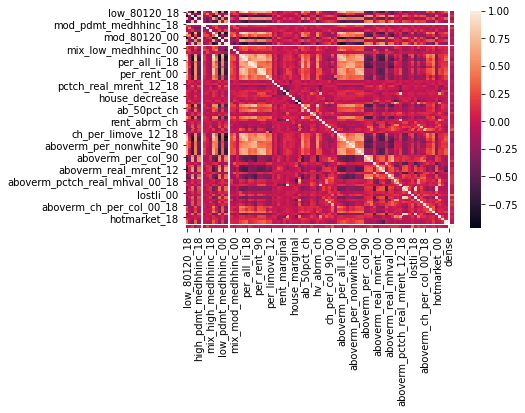

In [13]:
import seaborn as sns

sns.heatmap(df2.corr())

In [14]:
#df2.corr()['inc80_18'] > 0.9


In [15]:
#ref: https://chrisalbon.com/machine_learning/feature_selection/drop_highly_correlated_features/

# Create correlation matrix
corr_matrix = df2.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [16]:
to_drop

['high_80120_18', 'high_80120_00', 'per_all_li_00', 'per_all_li_18']

In [17]:
# Drop features 
#df2.drop(df[to_drop], axis=1)

### Convert select continous variables to categorical and one hot encode 

In [18]:
# convert already dummy variables from float to int
dummy_var_list = ['hotmarket_00', 'hotmarket_18', 'low_pdmt_medhhinc_00', 'high_pdmt_medhhinc_00', 'mod_pdmt_medhhinc_00',
                  'mix_low_medhhinc_00', 'mix_mod_medhhinc_00',  'mix_high_medhhinc_00', 'low_pdmt_medhhinc_18', 'high_pdmt_medhhinc_18',
                  'mod_pdmt_medhhinc_18', 'mix_low_medhhinc_18', 'mix_mod_medhhinc_18', 'mix_high_medhhinc_18', 'presence_ph_LIHTC',
                  'typology']
for dummycol in dummy_var_list:
  df2.loc[:,(dummycol)] = df2[dummycol].astype(int, copy=False)

In [19]:
# use float variables to represent each categorical variable by dividing into quartiles
def convert_percents_to_dummy_vars(X):

    columns = X.columns

    bin_labels_4 = ['VL', 'L', 'H',  'VH']


    for i in range(0, len(columns)):
        if X[columns[i]].dtype=='float64':
          print("Processing: " + columns[i])

          X[columns[i]] = X[columns[i]].fillna(0)
          cat_label = "{}_cat".format(columns[i])
          dummy_label = "{}_dummy".format(columns[i])
          X[cat_label] = pd.qcut(X[columns[i]], 
                                 4,
                              precision=5,
                              duplicates = 'drop',
                              labels=bin_labels_4)
          X = pd.get_dummies(X, columns=[cat_label], prefix=[dummy_label])
          X = X.drop([columns[i]], axis=1)

    return X

In [20]:
# check if categorical then convert to dummy using label and onehot encoding
def convert_categorical_to_dummy_vars(X):

    from sklearn.preprocessing import LabelEncoder
    from sklearn.preprocessing import OneHotEncoder    

    columns = X.columns
    indices = X.index
    new_columns = []
    encoded_x = None

    for i in range(0, len(columns)):
        if X[columns[i]].dtype=='O':
          print("Processing: " + columns[i])


          label_encoder = LabelEncoder()
          le = label_encoder.fit(X[columns[i]].apply(str))
          for class_ in le.classes_:
              new_columns.append("{}_{}".format(columns[i],class_))
              
          feature = le.transform(X[columns[i]].apply(str))
          feature = feature.reshape(X.shape[0], 1)
          onehot_encoder = OneHotEncoder(sparse=False)
          onehot_encoder.fit(feature)
          feature = onehot_encoder.transform(feature)
          if encoded_x is None:
              encoded_x = feature
          else:
              encoded_x = np.concatenate((encoded_x, feature), axis=1)
          X = X.drop(columns[i], axis=1)
    new_columns.extend(X.columns)

    X = pd.DataFrame(np.concatenate((encoded_x,X),axis=1),index=indices,columns=new_columns)
    
    return X


### Convert Percentage (floats) to Quartiles and Dummy Variables 

In [21]:
# process and save data all converted to one hot encoding
df2 = convert_percents_to_dummy_vars(df2)





Processing: low_80120_18
Processing: mod_80120_18
Processing: high_80120_18
Processing: low_80120_00
Processing: mod_80120_00
Processing: high_80120_00
Processing: per_all_li_90
Processing: per_all_li_00
Processing: per_all_li_18
Processing: per_nonwhite_90
Processing: per_nonwhite_00
Processing: per_nonwhite_18
Processing: per_rent_90
Processing: per_rent_00
Processing: per_rent_18
Processing: per_limove_18
Processing: per_limove_12
Processing: pctch_real_mhval_00_18
Processing: pctch_real_mrent_12_18
Processing: per_ch_zillow_12_18
Processing: pctch_real_hinc_90_00
Processing: pctch_real_hinc_00_18
Processing: ch_per_col_90_00
Processing: ch_per_col_00_18
Processing: ch_per_limove_12_18


In [22]:
df2 = convert_categorical_to_dummy_vars(df2)


Processing: lmh_flag_category
Processing: change_flag_category


iii. Save the dataset as a CSV file. The first line of the CSV file should be the attribute
names as described in the previous question. 

In [23]:
df2.to_csv("{}/data/processed_{}".format(customized_path_to_homework, file_name))

# **Association Rule Calculations**


In [24]:
#load already processed data 
df3 = pd.read_csv("{}/data/processed_{}".format(customized_path_to_homework, file_name), index_col=0)
df3 = df3.astype(int)


In [25]:
confidence_cut = 0.8
lift_cut = 1.0
conviction_cut = 0.9
support_cut = 0.75

# Associaton Rules Analysis - Gentrified

In [26]:
gent_class = 'gent'
df_class = df3[df3['typology'].isin(['4', '5','99'])].drop(['typology'], axis=1)


In [27]:
df_class = df_class.astype(bool)


In [28]:
frequent_itemsets = fpgrowth(df_class, min_support= support_cut, use_colnames=True, verbose=1)
#%timeit  frequent_itemsets_gent = apriori(df_gent, min_support=0.07, use_colnames=True, verbose=1, low_memory=False)

19 itemset(s) from tree conditioned on items ()
0 itemset(s) from tree conditioned on items (ab_50pct_ch)
1 itemset(s) from tree conditioned on items (aboverm_per_all_li_90)
3 itemset(s) from tree conditioned on items (dp_PChRent)
7 itemset(s) from tree conditioned on items (change_flag_category_ch_rapid_increase)
15 itemset(s) from tree conditioned on items (aboverm_per_rent_90)
31 itemset(s) from tree conditioned on items (aboverm_per_rent_00)
8 itemset(s) from tree conditioned on items (aboverm_per_all_li_00)
0 itemset(s) from tree conditioned on items (aboverm_per_all_li_00, change_flag_category_ch_rapid_increase)
1 itemset(s) from tree conditioned on items (aboverm_per_all_li_00, dp_PChRent)
3 itemset(s) from tree conditioned on items (aboverm_per_all_li_00, aboverm_per_all_li_90)
7 itemset(s) from tree conditioned on items (aboverm_per_all_li_00, ab_50pct_ch)
63 itemset(s) from tree conditioned on items (aboverm_per_all_li_00, aboverm_per_rent_00)
127 itemset(s) from tree conditi

In [29]:
frequent_itemsets.dtypes

support     float64
itemsets     object
dtype: object

In [30]:
import pickle 

filehandler = open("{}/data/freqitems_{}_{}".format(customized_path_to_homework, gent_class, file_name), 'wb') 
pickle.dump(frequent_itemsets, filehandler)



### Gentrification Calculate Rule Metrics

In [31]:
import pickle 
filehandler = open("{}/data/freqitems_{}_{}".format(customized_path_to_homework, gent_class, file_name), 'rb') 
frequent_itemsets = pickle.load(filehandler)

In [32]:
frequent_itemsets.head(10)

,support,itemsets
0,1.000000,(ab_50pct_ch)
1,1.000000,(aboverm_per_all_li_90)
2,0.956522,(dp_PChRent)
3,0.956522,(change_flag_category_ch_rapid_increase)
4,0.956522,(aboverm_per_rent_90)
5,0.913043,(aboverm_per_rent_00)
6,0.913043,(aboverm_per_all_li_00)
7,0.869565,(aboverm_per_nonwhite_00)
8,0.869565,(per_all_li_90_dummy_VH)
9,0.869565,(aboverm_per_col_18)


In [33]:
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=confidence_cut)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ab_50pct_ch),(aboverm_per_all_li_90),1.000000,1.000000,1.000000,1.000000,1.0,0.0,inf
1,(aboverm_per_all_li_90),(ab_50pct_ch),1.000000,1.000000,1.000000,1.000000,1.0,0.0,inf
2,(aboverm_per_all_li_90),(dp_PChRent),1.000000,0.956522,0.956522,0.956522,1.0,0.0,1.0
3,(dp_PChRent),(aboverm_per_all_li_90),0.956522,1.000000,0.956522,1.000000,1.0,0.0,inf
4,(ab_50pct_ch),(dp_PChRent),1.000000,0.956522,0.956522,0.956522,1.0,0.0,1.0
5,(dp_PChRent),(ab_50pct_ch),0.956522,1.000000,0.956522,1.000000,1.0,0.0,inf
6,"(ab_50pct_ch, aboverm_per_all_li_90)",(dp_PChRent),1.000000,0.956522,0.956522,0.956522,1.0,0.0,1.0
7,"(ab_50pct_ch, dp_PChRent)",(aboverm_per_all_li_90),0.956522,1.000000,0.956522,1.000000,1.0,0.0,inf
8,"(aboverm_per_all_li_90, dp_PChRent)",(ab_50pct_ch),0.956522,1.000000,0.956522,1.000000,1.0,0.0,inf
9,(ab_50pct_ch),"(aboverm_per_all_li_90, dp_PChRent)",1.000000,0.956522,0.956522,0.956522,1.0,0.0,1.0


In [34]:
# save association rules
import pickle 

filehandler = open("{}/data/assocrules_{}_{}".format(customized_path_to_homework, gent_class, file_name), 'wb') 
pickle.dump(rules, filehandler)

**Rules with high Lift and Confidence**

In [35]:
#load association rules 
import pickle 
filehandler = open("{}/data/assocrules_{}_{}".format(customized_path_to_homework, gent_class, file_name), 'rb') 
rules = pickle.load(filehandler)

In [36]:
rules[ (rules['lift'] >= lift_cut) &
       (rules['conviction'] >= conviction_cut) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ab_50pct_ch),(aboverm_per_all_li_90),1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,inf
1,(aboverm_per_all_li_90),(ab_50pct_ch),1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,inf
2,(aboverm_per_all_li_90),(dp_PChRent),1.000000,0.956522,0.956522,0.956522,1.000000,0.000000,1.000000
3,(dp_PChRent),(aboverm_per_all_li_90),0.956522,1.000000,0.956522,1.000000,1.000000,0.000000,inf
4,(ab_50pct_ch),(dp_PChRent),1.000000,0.956522,0.956522,0.956522,1.000000,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...
1890108,(aboverm_per_all_li_00),"(aboverm_ch_per_col_00_18, dp_PChRent, lostli_...",0.913043,0.782609,0.782609,0.857143,1.095238,0.068053,1.521739
1890109,(hotmarket_18),"(aboverm_ch_per_col_00_18, dp_PChRent, lostli_...",0.913043,0.782609,0.782609,0.857143,1.095238,0.068053,1.521739
1890110,(change_flag_category_ch_rapid_increase),"(aboverm_ch_per_col_00_18, dp_PChRent, lostli_...",0.956522,0.782609,0.782609,0.818182,1.045455,0.034026,1.195652
1890111,(aboverm_pctch_real_hinc_00_18),"(aboverm_ch_per_col_00_18, dp_PChRent, lostli_...",0.869565,0.782609,0.782609,0.900000,1.150000,0.102079,2.173913


ref: http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.150.6616&rep=rep1&type=pdf

Confidence ranges from 0 to 1. Confidence is an estimate of Pr(C | A), the
probability of observing C given A. After obtaining a rule set, one can immediatly
use confidence as a basis for classifying one new case x. Of all the rules that
apply to x (i.e., the rules whose antecedent is true in x), we choose the one
with highest confidence. This loosely follows the optimal Bayes classifier

In [37]:
rules.nlargest(10, 'confidence')

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ab_50pct_ch),(aboverm_per_all_li_90),1.000000,1.000000,1.000000,1.0,1.000000,0.000000,inf
1,(aboverm_per_all_li_90),(ab_50pct_ch),1.000000,1.000000,1.000000,1.0,1.000000,0.000000,inf
3,(dp_PChRent),(aboverm_per_all_li_90),0.956522,1.000000,0.956522,1.0,1.000000,0.000000,inf
5,(dp_PChRent),(ab_50pct_ch),0.956522,1.000000,0.956522,1.0,1.000000,0.000000,inf
7,"(ab_50pct_ch, dp_PChRent)",(aboverm_per_all_li_90),0.956522,1.000000,0.956522,1.0,1.000000,0.000000,inf
8,"(aboverm_per_all_li_90, dp_PChRent)",(ab_50pct_ch),0.956522,1.000000,0.956522,1.0,1.000000,0.000000,inf
11,(dp_PChRent),"(ab_50pct_ch, aboverm_per_all_li_90)",0.956522,1.000000,0.956522,1.0,1.000000,0.000000,inf
12,(change_flag_category_ch_rapid_increase),(dp_PChRent),0.956522,0.956522,0.956522,1.0,1.045455,0.041588,inf
13,(dp_PChRent),(change_flag_category_ch_rapid_increase),0.956522,0.956522,0.956522,1.0,1.045455,0.041588,inf
15,(change_flag_category_ch_rapid_increase),(aboverm_per_all_li_90),0.956522,1.000000,0.956522,1.0,1.000000,0.000000,inf


ref: http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.150.6616&rep=rep1&type=pdf

Conviction is another measure proposed in [4] to tackle some of the weaknesses of confidence and lift. Unlike lift, conviction is sensitive to rule direction
(conv(A → C) 6= conv(C → A)). Conviction is somewhat inspired in the logical
definition of implication and attempts to measure the degree of implication of
a rule. Conviction is infinite for logical implications (confidence 1), and is 1 if
A and C are independent

In [38]:
rules.nlargest(10, 'conviction')

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ab_50pct_ch),(aboverm_per_all_li_90),1.000000,1.000000,1.000000,1.0,1.000000,0.000000,inf
1,(aboverm_per_all_li_90),(ab_50pct_ch),1.000000,1.000000,1.000000,1.0,1.000000,0.000000,inf
3,(dp_PChRent),(aboverm_per_all_li_90),0.956522,1.000000,0.956522,1.0,1.000000,0.000000,inf
5,(dp_PChRent),(ab_50pct_ch),0.956522,1.000000,0.956522,1.0,1.000000,0.000000,inf
7,"(ab_50pct_ch, dp_PChRent)",(aboverm_per_all_li_90),0.956522,1.000000,0.956522,1.0,1.000000,0.000000,inf
8,"(aboverm_per_all_li_90, dp_PChRent)",(ab_50pct_ch),0.956522,1.000000,0.956522,1.0,1.000000,0.000000,inf
11,(dp_PChRent),"(ab_50pct_ch, aboverm_per_all_li_90)",0.956522,1.000000,0.956522,1.0,1.000000,0.000000,inf
12,(change_flag_category_ch_rapid_increase),(dp_PChRent),0.956522,0.956522,0.956522,1.0,1.045455,0.041588,inf
13,(dp_PChRent),(change_flag_category_ch_rapid_increase),0.956522,0.956522,0.956522,1.0,1.045455,0.041588,inf
15,(change_flag_category_ch_rapid_increase),(aboverm_per_all_li_90),0.956522,1.000000,0.956522,1.0,1.000000,0.000000,inf


ref: http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.150.6616&rep=rep1&type=pdf

Lift measures how far from independence are A and C. It ranges within
[0, +∞[. Values close to 1 imply that A and C are independent and the rule
is not interesting. 

In [39]:
rules.nlargest(10, 'lift')

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
40432,"(aboverm_per_rent_90, aboverm_per_nonwhite_00,...","(aboverm_per_nonwhite_90, aboverm_per_rent_00)",0.782609,0.826087,0.782609,1.000000,1.210526,0.136106,inf
40437,"(aboverm_per_nonwhite_90, aboverm_per_rent_00)","(aboverm_per_rent_90, aboverm_per_nonwhite_00,...",0.826087,0.782609,0.782609,0.947368,1.210526,0.136106,4.130435
40459,"(aboverm_per_rent_90, aboverm_ch_per_col_00_18...","(aboverm_per_nonwhite_90, aboverm_per_rent_00)",0.782609,0.826087,0.782609,1.000000,1.210526,0.136106,inf
40470,"(aboverm_per_nonwhite_90, aboverm_per_rent_00)","(aboverm_per_rent_90, aboverm_ch_per_col_00_18...",0.826087,0.782609,0.782609,0.947368,1.210526,0.136106,4.130435
43304,"(ab_50pct_ch, aboverm_per_rent_90, aboverm_per...","(aboverm_per_nonwhite_90, aboverm_per_rent_00)",0.782609,0.826087,0.782609,1.000000,1.210526,0.136106,inf
43314,"(ab_50pct_ch, aboverm_per_nonwhite_90, aboverm...","(aboverm_per_rent_90, aboverm_per_nonwhite_00,...",0.826087,0.782609,0.782609,0.947368,1.210526,0.136106,4.130435
43319,"(aboverm_per_rent_90, aboverm_per_nonwhite_00,...","(ab_50pct_ch, aboverm_per_nonwhite_90, aboverm...",0.782609,0.826087,0.782609,1.000000,1.210526,0.136106,inf
43329,"(aboverm_per_nonwhite_90, aboverm_per_rent_00)","(ab_50pct_ch, aboverm_per_rent_90, aboverm_per...",0.826087,0.782609,0.782609,0.947368,1.210526,0.136106,4.130435
43361,"(ab_50pct_ch, aboverm_per_rent_90, aboverm_ch_...","(aboverm_per_nonwhite_90, aboverm_per_rent_00)",0.782609,0.826087,0.782609,1.000000,1.210526,0.136106,inf
43374,"(aboverm_per_rent_90, aboverm_ch_per_col_00_18...","(ab_50pct_ch, aboverm_per_nonwhite_90, aboverm...",0.782609,0.826087,0.782609,1.000000,1.210526,0.136106,inf


In [40]:
rules.nlargest(100, ['conviction', 'lift', 'confidence', 'support'])

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
220005,"(aboverm_per_rent_90, aboverm_per_all_li_00, h...","(aboverm_per_nonwhite_90, aboverm_per_rent_00)",0.826087,0.826087,0.826087,1.0,1.210526,0.143667,inf
220012,"(aboverm_per_nonwhite_90, aboverm_per_rent_00)","(aboverm_per_rent_90, aboverm_per_all_li_00, h...",0.826087,0.826087,0.826087,1.0,1.210526,0.143667,inf
220092,"(aboverm_per_rent_90, aboverm_ch_per_col_00_18...","(aboverm_per_nonwhite_90, aboverm_per_rent_00)",0.826087,0.826087,0.826087,1.0,1.210526,0.143667,inf
220105,"(aboverm_per_nonwhite_90, aboverm_per_rent_00)","(aboverm_per_rent_90, aboverm_ch_per_col_00_18...",0.826087,0.826087,0.826087,1.0,1.210526,0.143667,inf
221572,"(aboverm_per_rent_90, dp_PChRent, aboverm_per_...","(aboverm_per_nonwhite_90, aboverm_per_rent_00)",0.826087,0.826087,0.826087,1.0,1.210526,0.143667,inf
...,...,...,...,...,...,...,...,...,...
227496,"(aboverm_per_rent_90, aboverm_ch_per_col_00_18...","(hotmarket_18, aboverm_per_nonwhite_90, dp_PCh...",0.826087,0.826087,0.826087,1.0,1.210526,0.143667,inf
227498,"(aboverm_ch_per_col_00_18, aboverm_per_all_li_...","(aboverm_per_rent_90, aboverm_per_nonwhite_90,...",0.826087,0.826087,0.826087,1.0,1.210526,0.143667,inf
227503,"(aboverm_per_rent_90, aboverm_per_nonwhite_90,...","(hotmarket_18, aboverm_ch_per_col_00_18, above...",0.826087,0.826087,0.826087,1.0,1.210526,0.143667,inf
227505,"(aboverm_per_nonwhite_90, dp_PChRent, aboverm_...","(aboverm_per_rent_90, aboverm_ch_per_col_00_18...",0.826087,0.826087,0.826087,1.0,1.210526,0.143667,inf


Plot Metrics

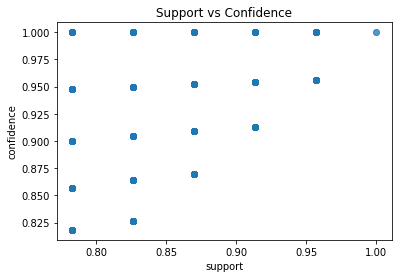

In [41]:
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

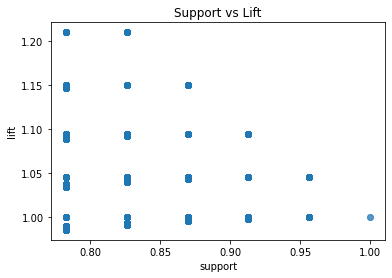

In [42]:
plt.scatter(rules['support'], rules['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

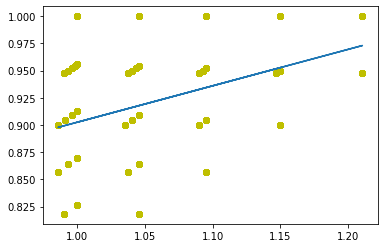

In [43]:
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'], 
 fit_fn(rules['lift']))

# **Association Analysis - Non Gentrified**

In [44]:
gent_class = 'nongent'

In [45]:
df_class = df3[df3['typology'].isin(['1', '2', '3'])].drop(['typology'], axis=1)
df_class = df_class.astype(bool)

In [46]:
frequent_itemsets = fpgrowth(df_class, min_support=support_cut, use_colnames=True, verbose=1)

15 itemset(s) from tree conditioned on items ()
0 itemset(s) from tree conditioned on items (aboverm_per_all_li_18)
1 itemset(s) from tree conditioned on items (aboverm_per_all_li_00)
3 itemset(s) from tree conditioned on items (ab_50pct_ch)
7 itemset(s) from tree conditioned on items (dp_PChRent)
4 itemset(s) from tree conditioned on items (aboverm_per_all_li_90)
0 itemset(s) from tree conditioned on items (aboverm_per_all_li_90, aboverm_per_all_li_18)
1 itemset(s) from tree conditioned on items (aboverm_per_all_li_90, aboverm_per_all_li_00)
3 itemset(s) from tree conditioned on items (aboverm_per_all_li_90, ab_50pct_ch)
7 itemset(s) from tree conditioned on items (aboverm_per_all_li_90, dp_PChRent)
5 itemset(s) from tree conditioned on items (aboverm_per_rent_18)
0 itemset(s) from tree conditioned on items (aboverm_per_rent_18, aboverm_per_all_li_18)
1 itemset(s) from tree conditioned on items (aboverm_per_rent_18, ab_50pct_ch)
3 itemset(s) from tree conditioned on items (aboverm_per

In [47]:
import pickle 

filehandler = open("{}/data/freqitems_{}_{}".format(customized_path_to_homework, gent_class, file_name), 'wb') 
pickle.dump(frequent_itemsets, filehandler)

### Non-Gentrification Calculate Rule Metrics

In [48]:
import pickle 
filehandler = open("{}/data/freqitems_{}_{}".format(customized_path_to_homework, gent_class, file_name), 'rb') 
frequent_itemsets = pickle.load(filehandler)

In [49]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=confidence_cut)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(aboverm_per_all_li_18),(aboverm_per_all_li_00),1.000000,0.989950,0.989950,0.989950,1.000000,0.000000,1.000000
1,(aboverm_per_all_li_00),(aboverm_per_all_li_18),0.989950,1.000000,0.989950,1.000000,1.000000,0.000000,inf
2,(ab_50pct_ch),(aboverm_per_all_li_18),0.984925,1.000000,0.984925,1.000000,1.000000,0.000000,inf
3,(aboverm_per_all_li_18),(ab_50pct_ch),1.000000,0.984925,0.984925,0.984925,1.000000,0.000000,1.000000
4,(ab_50pct_ch),(aboverm_per_all_li_00),0.984925,0.989950,0.974874,0.989796,0.999845,-0.000152,0.984925
5,(aboverm_per_all_li_00),(ab_50pct_ch),0.989950,0.984925,0.974874,0.984772,0.999845,-0.000152,0.989950
6,"(ab_50pct_ch, aboverm_per_all_li_18)",(aboverm_per_all_li_00),0.984925,0.989950,0.974874,0.989796,0.999845,-0.000152,0.984925
7,"(ab_50pct_ch, aboverm_per_all_li_00)",(aboverm_per_all_li_18),0.974874,1.000000,0.974874,1.000000,1.000000,0.000000,inf
8,"(aboverm_per_all_li_18, aboverm_per_all_li_00)",(ab_50pct_ch),0.989950,0.984925,0.974874,0.984772,0.999845,-0.000152,0.989950
9,(ab_50pct_ch),"(aboverm_per_all_li_18, aboverm_per_all_li_00)",0.984925,0.989950,0.974874,0.989796,0.999845,-0.000152,0.984925


In [50]:
# save association rules
import pickle 

filehandler = open("{}/data/assocrules_{}_{}".format(customized_path_to_homework, gent_class, file_name), 'wb') 
pickle.dump(rules, filehandler)

**Rules with high Lift and Confidence**




In [51]:
#load association rules 
import pickle 
filehandler = open("{}/data/assocrules_{}_{}".format(customized_path_to_homework, gent_class, file_name), 'rb') 
rules = pickle.load(filehandler)

In [52]:
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(aboverm_per_all_li_18),(aboverm_per_all_li_00),1.000000,0.989950,0.989950,0.989950,1.000000,0.000000,1.000000
1,(aboverm_per_all_li_00),(aboverm_per_all_li_18),0.989950,1.000000,0.989950,1.000000,1.000000,0.000000,inf
2,(ab_50pct_ch),(aboverm_per_all_li_18),0.984925,1.000000,0.984925,1.000000,1.000000,0.000000,inf
3,(aboverm_per_all_li_18),(ab_50pct_ch),1.000000,0.984925,0.984925,0.984925,1.000000,0.000000,1.000000
4,(ab_50pct_ch),(aboverm_per_all_li_00),0.984925,0.989950,0.974874,0.989796,0.999845,-0.000152,0.984925
5,(aboverm_per_all_li_00),(ab_50pct_ch),0.989950,0.984925,0.974874,0.984772,0.999845,-0.000152,0.989950
6,"(ab_50pct_ch, aboverm_per_all_li_18)",(aboverm_per_all_li_00),0.984925,0.989950,0.974874,0.989796,0.999845,-0.000152,0.984925
7,"(ab_50pct_ch, aboverm_per_all_li_00)",(aboverm_per_all_li_18),0.974874,1.000000,0.974874,1.000000,1.000000,0.000000,inf
8,"(aboverm_per_all_li_18, aboverm_per_all_li_00)",(ab_50pct_ch),0.989950,0.984925,0.974874,0.984772,0.999845,-0.000152,0.989950
9,(ab_50pct_ch),"(aboverm_per_all_li_18, aboverm_per_all_li_00)",0.984925,0.989950,0.974874,0.989796,0.999845,-0.000152,0.984925


In [53]:
rules[ (rules['lift'] >= lift_cut) &
       (rules['conviction'] >= conviction_cut) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(aboverm_per_all_li_18),(aboverm_per_all_li_00),1.000000,0.989950,0.989950,0.989950,1.000000,0.000000,1.000000
1,(aboverm_per_all_li_00),(aboverm_per_all_li_18),0.989950,1.000000,0.989950,1.000000,1.000000,0.000000,inf
2,(ab_50pct_ch),(aboverm_per_all_li_18),0.984925,1.000000,0.984925,1.000000,1.000000,0.000000,inf
3,(aboverm_per_all_li_18),(ab_50pct_ch),1.000000,0.984925,0.984925,0.984925,1.000000,0.000000,1.000000
7,"(ab_50pct_ch, aboverm_per_all_li_00)",(aboverm_per_all_li_18),0.974874,1.000000,0.974874,1.000000,1.000000,0.000000,inf
...,...,...,...,...,...,...,...,...,...
16362,"(high_80120_18_dummy_VL, dp_PChRent)","(ab_50pct_ch, aboverm_per_all_li_18, aboverm_p...",0.763819,0.974874,0.753769,0.986842,1.012276,0.009141,1.909548
16363,"(high_80120_18_dummy_VL, aboverm_per_all_li_00)","(ab_50pct_ch, aboverm_per_all_li_18, dp_PChRent)",0.758794,0.974874,0.753769,0.993377,1.018980,0.014040,3.793970
16364,"(ab_50pct_ch, high_80120_18_dummy_VL)","(aboverm_per_all_li_18, dp_PChRent, aboverm_pe...",0.768844,0.964824,0.753769,0.980392,1.016136,0.011969,1.793970
16365,"(aboverm_per_all_li_18, high_80120_18_dummy_VL)","(ab_50pct_ch, dp_PChRent, aboverm_per_all_li_00)",0.768844,0.964824,0.753769,0.980392,1.016136,0.011969,1.793970


In [54]:
#print( (rules.nlargest(100, ['conviction', 'lift', 'confidence', 'support']))[['antecedents', 'consequents']] )
rules.nlargest(100, ['conviction', 'lift', 'confidence', 'support'])

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
9262,(per_all_li_18_dummy_VH),(low_80120_18_dummy_VH),0.798995,0.798995,0.798995,1.0,1.251572,0.160602,inf
9263,(low_80120_18_dummy_VH),(per_all_li_18_dummy_VH),0.798995,0.798995,0.798995,1.0,1.251572,0.160602,inf
9275,"(per_all_li_18_dummy_VH, ab_50pct_ch)",(low_80120_18_dummy_VH),0.798995,0.798995,0.798995,1.0,1.251572,0.160602,inf
9277,"(ab_50pct_ch, low_80120_18_dummy_VH)",(per_all_li_18_dummy_VH),0.798995,0.798995,0.798995,1.0,1.251572,0.160602,inf
9278,(per_all_li_18_dummy_VH),"(ab_50pct_ch, low_80120_18_dummy_VH)",0.798995,0.798995,0.798995,1.0,1.251572,0.160602,inf
...,...,...,...,...,...,...,...,...,...
9785,"(aboverm_per_all_li_90, dp_PChRent, low_80120_...","(per_all_li_18_dummy_VH, ab_50pct_ch)",0.768844,0.798995,0.768844,1.0,1.251572,0.154542,inf
9807,"(aboverm_per_all_li_90, aboverm_per_all_li_18,...",(per_all_li_18_dummy_VH),0.768844,0.798995,0.768844,1.0,1.251572,0.154542,inf
9808,"(per_all_li_18_dummy_VH, aboverm_per_all_li_90...",(low_80120_18_dummy_VH),0.768844,0.798995,0.768844,1.0,1.251572,0.154542,inf
9811,"(aboverm_per_all_li_90, dp_PChRent, low_80120_...","(per_all_li_18_dummy_VH, aboverm_per_all_li_18)",0.768844,0.798995,0.768844,1.0,1.251572,0.154542,inf


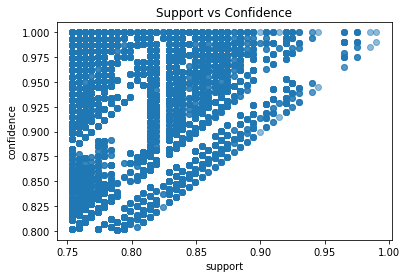

In [55]:
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

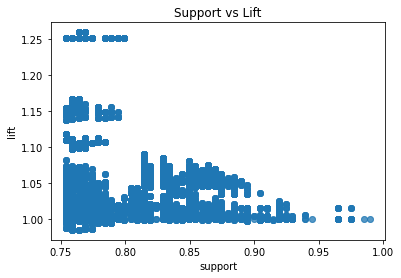

In [56]:
plt.scatter(rules['support'], rules['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

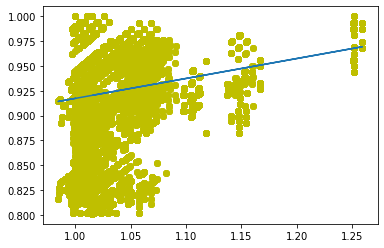

In [57]:
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'], 
 fit_fn(rules['lift']))

## Association Analysis - Stable/Exclusive

In [58]:
gent_class = 'exclusive'

In [59]:
df_class = df3[df3['typology'].isin([ '7', '8', '9'])].drop(['typology'], axis=1)
df_class = df_class.astype(bool)

In [60]:
frequent_itemsets = fpgrowth(df_class, min_support=support_cut, use_colnames=True, verbose=1)

6 itemset(s) from tree conditioned on items ()
0 itemset(s) from tree conditioned on items (dp_PChRent)
1 itemset(s) from tree conditioned on items (ab_50pct_ch)
0 itemset(s) from tree conditioned on items (aboverm_real_mhval_00)
2 itemset(s) from tree conditioned on items (change_flag_category_ch_increase)
0 itemset(s) from tree conditioned on items (change_flag_category_ch_increase, ab_50pct_ch)
0 itemset(s) from tree conditioned on items (change_flag_category_ch_increase, dp_PChRent)
1 itemset(s) from tree conditioned on items (aboverm_real_mrent_00)
1 itemset(s) from tree conditioned on items (house_increase)


In [61]:
import pickle 

filehandler = open("{}/data/freqitems_{}_{}".format(customized_path_to_homework, gent_class, file_name), 'wb') 
pickle.dump(frequent_itemsets, filehandler)

In [62]:
import pickle 
filehandler = open("{}/data/freqitems_{}_{}".format(customized_path_to_homework, gent_class, file_name), 'rb') 
frequent_itemsets = pickle.load(filehandler)

In [63]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=confidence_cut)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ab_50pct_ch),(dp_PChRent),0.850575,0.902299,0.775862,0.912162,1.010931,0.008389,1.112290
1,(dp_PChRent),(ab_50pct_ch),0.902299,0.850575,0.775862,0.859873,1.010931,0.008389,1.066353
2,(ab_50pct_ch),(change_flag_category_ch_increase),0.850575,0.839080,0.758621,0.891892,1.062940,0.044920,1.488506
3,(change_flag_category_ch_increase),(ab_50pct_ch),0.839080,0.850575,0.758621,0.904110,1.062940,0.044920,1.558292
4,(change_flag_category_ch_increase),(dp_PChRent),0.839080,0.902299,0.758621,0.904110,1.002007,0.001519,1.018883
5,(dp_PChRent),(change_flag_category_ch_increase),0.902299,0.839080,0.758621,0.840764,1.002007,0.001519,1.010575
6,(aboverm_real_mrent_00),(change_flag_category_ch_increase),0.816092,0.839080,0.752874,0.922535,1.099460,0.068107,2.077325
7,(change_flag_category_ch_increase),(aboverm_real_mrent_00),0.839080,0.816092,0.752874,0.897260,1.099460,0.068107,1.790038
8,(house_increase),(change_flag_category_ch_increase),0.804598,0.839080,0.775862,0.964286,1.149217,0.100740,4.505747
9,(change_flag_category_ch_increase),(house_increase),0.839080,0.804598,0.775862,0.924658,1.149217,0.100740,2.593521


In [64]:
# save association rules
import pickle 

filehandler = open("{}/data/assocrules_{}_{}".format(customized_path_to_homework, gent_class, file_name), 'wb') 
pickle.dump(rules, filehandler)

In [65]:
#load association rules 
import pickle 
filehandler = open("{}/data/assocrules_{}_{}".format(customized_path_to_homework, gent_class, file_name), 'rb') 
rules = pickle.load(filehandler)

In [66]:
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ab_50pct_ch),(dp_PChRent),0.850575,0.902299,0.775862,0.912162,1.010931,0.008389,1.112290
1,(dp_PChRent),(ab_50pct_ch),0.902299,0.850575,0.775862,0.859873,1.010931,0.008389,1.066353
2,(ab_50pct_ch),(change_flag_category_ch_increase),0.850575,0.839080,0.758621,0.891892,1.062940,0.044920,1.488506
3,(change_flag_category_ch_increase),(ab_50pct_ch),0.839080,0.850575,0.758621,0.904110,1.062940,0.044920,1.558292
4,(change_flag_category_ch_increase),(dp_PChRent),0.839080,0.902299,0.758621,0.904110,1.002007,0.001519,1.018883
5,(dp_PChRent),(change_flag_category_ch_increase),0.902299,0.839080,0.758621,0.840764,1.002007,0.001519,1.010575
6,(aboverm_real_mrent_00),(change_flag_category_ch_increase),0.816092,0.839080,0.752874,0.922535,1.099460,0.068107,2.077325
7,(change_flag_category_ch_increase),(aboverm_real_mrent_00),0.839080,0.816092,0.752874,0.897260,1.099460,0.068107,1.790038
8,(house_increase),(change_flag_category_ch_increase),0.804598,0.839080,0.775862,0.964286,1.149217,0.100740,4.505747
9,(change_flag_category_ch_increase),(house_increase),0.839080,0.804598,0.775862,0.924658,1.149217,0.100740,2.593521


In [67]:
rules[ (rules['lift'] >= lift_cut) &
       (rules['conviction'] >= conviction_cut) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ab_50pct_ch),(dp_PChRent),0.850575,0.902299,0.775862,0.912162,1.010931,0.008389,1.112290
1,(dp_PChRent),(ab_50pct_ch),0.902299,0.850575,0.775862,0.859873,1.010931,0.008389,1.066353
2,(ab_50pct_ch),(change_flag_category_ch_increase),0.850575,0.839080,0.758621,0.891892,1.062940,0.044920,1.488506
3,(change_flag_category_ch_increase),(ab_50pct_ch),0.839080,0.850575,0.758621,0.904110,1.062940,0.044920,1.558292
4,(change_flag_category_ch_increase),(dp_PChRent),0.839080,0.902299,0.758621,0.904110,1.002007,0.001519,1.018883
5,(dp_PChRent),(change_flag_category_ch_increase),0.902299,0.839080,0.758621,0.840764,1.002007,0.001519,1.010575
6,(aboverm_real_mrent_00),(change_flag_category_ch_increase),0.816092,0.839080,0.752874,0.922535,1.099460,0.068107,2.077325
7,(change_flag_category_ch_increase),(aboverm_real_mrent_00),0.839080,0.816092,0.752874,0.897260,1.099460,0.068107,1.790038
8,(house_increase),(change_flag_category_ch_increase),0.804598,0.839080,0.775862,0.964286,1.149217,0.100740,4.505747
9,(change_flag_category_ch_increase),(house_increase),0.839080,0.804598,0.775862,0.924658,1.149217,0.100740,2.593521


In [68]:
rules.nlargest(100, ['conviction', 'lift', 'confidence', 'support'])

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
8,(house_increase),(change_flag_category_ch_increase),0.804598,0.839080,0.775862,0.964286,1.149217,0.100740,4.505747
9,(change_flag_category_ch_increase),(house_increase),0.839080,0.804598,0.775862,0.924658,1.149217,0.100740,2.593521
6,(aboverm_real_mrent_00),(change_flag_category_ch_increase),0.816092,0.839080,0.752874,0.922535,1.099460,0.068107,2.077325
7,(change_flag_category_ch_increase),(aboverm_real_mrent_00),0.839080,0.816092,0.752874,0.897260,1.099460,0.068107,1.790038
3,(change_flag_category_ch_increase),(ab_50pct_ch),0.839080,0.850575,0.758621,0.904110,1.062940,0.044920,1.558292
2,(ab_50pct_ch),(change_flag_category_ch_increase),0.850575,0.839080,0.758621,0.891892,1.062940,0.044920,1.488506
0,(ab_50pct_ch),(dp_PChRent),0.850575,0.902299,0.775862,0.912162,1.010931,0.008389,1.112290
1,(dp_PChRent),(ab_50pct_ch),0.902299,0.850575,0.775862,0.859873,1.010931,0.008389,1.066353
4,(change_flag_category_ch_increase),(dp_PChRent),0.839080,0.902299,0.758621,0.904110,1.002007,0.001519,1.018883
5,(dp_PChRent),(change_flag_category_ch_increase),0.902299,0.839080,0.758621,0.840764,1.002007,0.001519,1.010575
